In [1]:
import numpy as np
import pandas as pd
from skbio.stats.composition import clr
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from debiasm.torch_functions import rescale
from scipy.stats import pointbiserialr
from matplotlib.colors import LogNorm, Normalize

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'axes.edgecolor':'black', 
            'grid.color': 'black'
            }, 
       font_scale=2)
np.random.seed(0)

### description of experiment
- we generate a set of 50 positive and 50 negative samples
- samples w/ a positive `y` have 30 features drawn from a uniform distribution, and one that is empty
- samples w/ a negative `y` have 20 features drawn from a uniform distribution, and 11 empty features. 
- By construction, the 31st feature is empty for either 50% or none of the samples: will a clr transform introduce an association with `y` for that empty sample?
- We give all features an added pseudocount of $10^{-6}$, before which we rescale all samples to represent a relative abundance space
- Next, we run clr transfom using scipy.stats.composition's implementation

In [2]:
n_samples=100
frac_pos=.5
n_features_both = 20
n_features_pos = 10
n_features_empty = 1

np.random.seed(0)
n_pos = int( n_samples*frac_pos )
n_neg = n_samples-n_pos
# X = np.zeros((n_samples,
#              n_features_both + \
#              n_features_pos + \
#              n_features_empty
#              ))

X = np.hstack((
    np.vstack( ( np.random.uniform(size=( n_pos, n_features_both + n_features_pos )), 
            
                np.hstack(( np.random.uniform(size = ( n_neg, n_features_both )), 
                            np.zeros((n_neg, n_features_pos))
                          ) ))), 
    np.random.uniform(size=(n_samples, n_features_empty)) ## setting this extra feature from the same space
        )) 


y = np.array([1]*n_pos + [0]*n_neg)

rsc_df = rescale(X)
pseudocount = 10**np.floor(np.log10(rsc_df[rsc_df != 0].min()))

p-value of transformed empty feature and outcome:

In [3]:
X_clr = clr( rescale( pseudocount + rescale(X) ) ) ## the second `rescale` is different

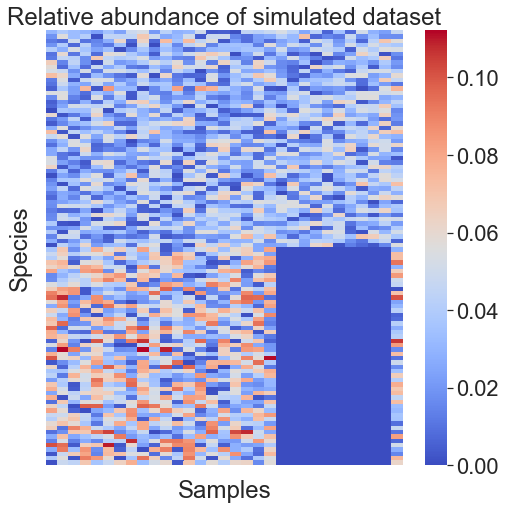

In [4]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(rescale(X), cmap='coolwarm')
ax.set(
       yticklabels=[], 
       xticklabels=[]
)
plt.xlabel('Samples')
plt.ylabel('Species')
plt.title('Relative abundance of simulated dataset')
plt.savefig('plots/Fig-S1a-dataset-heatmap.pdf', 
            bbox_inches='tight', 
            dpi=900, 
            format='pdf'
           )
# plt.title('Relative abundance of simulated dataset')
plt.show()

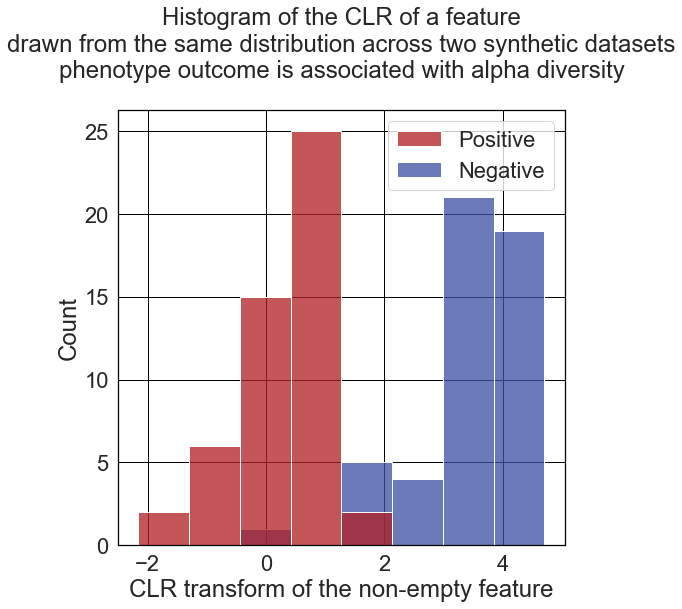

In [5]:

plt.figure(figsize=(8,8))
ax=sns.histplot(x = X_clr[:, -1], 
                hue = ['Negative' if not i else 'Positive' for i in y], 
                palette={'Negative':'#3b4ea2',
                         'Positive':'#b11e23'}, 
                alpha=0.75
             )
plt.title("Histogram of the CLR of a feature\ndrawn from the same distribution across two synthetic datasets\n"+\
            "phenotype outcome is associated with alpha diversity\n"
         )
plt.xlabel('CLR transform of the non-empty feature')
plt.savefig('plots/Fig-S1b.pdf', 
            dpi=900,
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

In [6]:
from scipy.stats import mannwhitneyu
mannwhitneyu(X_clr[:, -1][y==0], 
             X_clr[:, -1][y==1]
             )

MannwhitneyuResult(statistic=30.0, pvalue=2.102916316646988e-17)

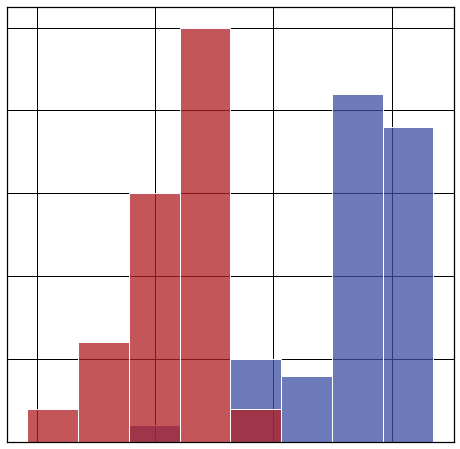

In [7]:
plt.figure(figsize=(8,8))
ax=sns.histplot(x = X_clr[:, -1], 
                hue = ['Negative' if not i else 'Positive' for i in y] ,
                palette={'Negative':'#3b4ea2',
                         'Positive':'#b11e23'}, 
                alpha=0.75
                 )
plt.title("Histogram of an empty feature that is associated with\n"+\
            "phenotype outcome after centered log ratio transform\n"
         )
plt.xlabel('CLR transform of the empty feature')
ax.get_legend().remove()
ax.set(
       yticklabels=[], 
       xticklabels=[])
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)
plt.savefig('plots/Fig-S1b-no-axes.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

In [8]:
np.random.seed(0)
n_pos = int( n_samples*frac_pos )
n_neg = n_samples-n_pos
# X = np.zeros((n_samples,
#              n_features_both + \
#              n_features_pos + \
#              n_features_empty
#              ))

X = np.hstack((
    np.vstack( ( np.random.uniform(size=( n_pos, n_features_both + n_features_pos )), 
            
                np.hstack(( np.random.uniform(size = ( n_neg, n_features_both )), 
                            np.zeros((n_neg, n_features_pos))
                          ) ))), 
    np.random.uniform(size=(n_samples, n_features_empty)) ## setting this extra feature from the same space
        )) 

## setting 1/2 of the value in each group to zero for 
##.  a zero that is randomly distributed between two environments
X[np.arange(X.shape[0])[::2], -1] = 0

y = np.array([1]*n_pos + [0]*n_neg)


rsc_df = rescale(X)
pseudocount = 10**np.floor(np.log10(rsc_df[rsc_df != 0].min()))
X_clr = clr( rescale( pseudocount + rescale(X) ) ) ## the second `rescale` is different

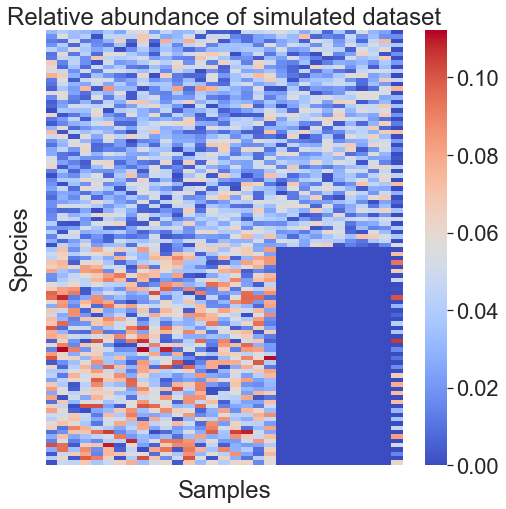

In [9]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(rescale(X), cmap='coolwarm')
ax.set(
       yticklabels=[], 
       xticklabels=[]
)
plt.xlabel('Samples')
plt.ylabel('Species')
plt.title('Relative abundance of simulated dataset')
plt.savefig('plots/Fig-S1c-dataset-heatmap.pdf', 
            bbox_inches='tight', 
            dpi=900, 
            format='pdf'
            )
plt.title('Relative abundance of simulated dataset')
plt.show()

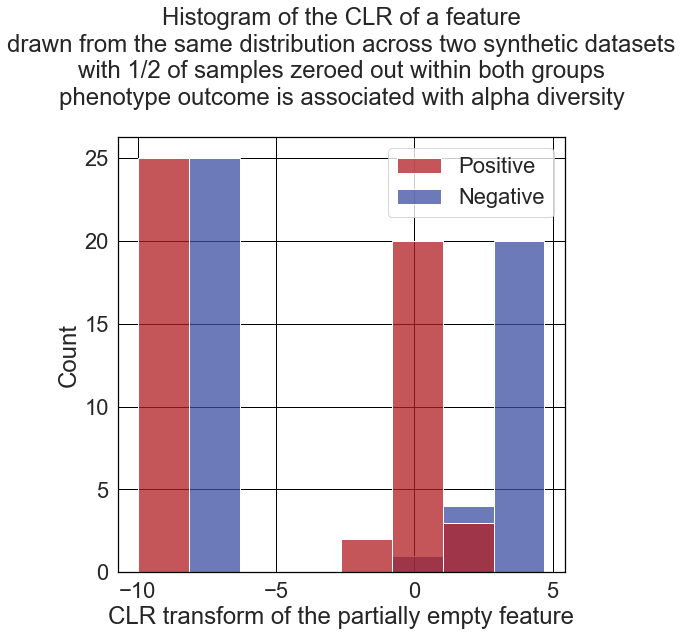

In [10]:

plt.figure(figsize=(8,8))
ax=sns.histplot(x = X_clr[:, -1], 
                hue = ['Negative' if not i else 'Positive' for i in y], 
                palette={'Negative':'#3b4ea2',
                         'Positive':'#b11e23'}, 
                alpha=.75
             )
plt.title("Histogram of the CLR of a feature\ndrawn from the same distribution across two synthetic datasets\n"+\
            "with 1/2 of samples zeroed out within both groups\nphenotype outcome is associated with alpha diversity\n"
         )
plt.xlabel('CLR transform of the partially empty feature')
plt.savefig('plots/Fig-S1d.pdf', 
            dpi=900,
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

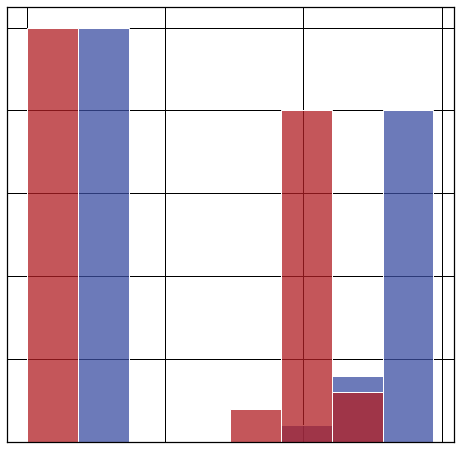

In [11]:
plt.figure(figsize=(8,8))
ax=sns.histplot(x = X_clr[:, -1], 
                hue = ['Negative' if not i else 'Positive' for i in y] ,
                palette={'Negative':'#3b4ea2',
                         'Positive':'#b11e23'}, 
                alpha=.75
                 )
plt.title("Histogram of an empty feature that is associated with\n"+\
            "phenotype outcome after centered log ratio transform\n"
         )
plt.xlabel('CLR transform of the empty feature')
ax.get_legend().remove()
ax.set(
       yticklabels=[], 
       xticklabels=[])
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)
plt.savefig('plots/Fig-S1d-no-axes.pdf', 
            dpi=900, 
            bbox_inches='tight', 
            format='pdf'
            )
plt.show()

In [12]:
# rescale( pseudocount + rescale(X) )[:, -1].round(9)

In [13]:
from scipy.stats import mannwhitneyu
mannwhitneyu(X_clr[:, -1][y==0], 
             X_clr[:, -1][y==1]
             )

MannwhitneyuResult(statistic=639.0, pvalue=1.2843511614656583e-05)